In [35]:
df = pd.read_csv('EmployedResumes.csv')
position_map = {
    "Entry": 0,
    "Junior": 1,
    "Mid": 2,
    "Senior": 3,
    "Lead": 4
}

education_map = {
    "High School": 0,
    "Associate": 1,
    "Bachelor's": 2,
    "Master's": 3,
    "PhD": 4
}

df["Position_Level_Num"] = df["Position_Level"].map(position_map)
df["Education_Level_Num"] = df["Education_Level"].map(education_map)



In [36]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[["Years_Experience", "Position_Level_Num", "Education_Level_Num"]]
y = df['Hired']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Probabilities:", y_prob)


Accuracy: 0.8833333333333333
Probabilities: [4.03097139e-01 1.78723596e-01 4.03097139e-01 4.40793599e-04
 1.47146322e-03 9.42281598e-01 3.68568862e-03 9.99975693e-01
 2.59705730e-04 7.36122796e-01 3.43990899e-02 2.59705730e-04
 9.95582199e-01 9.97889919e-01 3.29651187e-01 7.92999171e-01
 9.99934295e-01 9.75445744e-01 8.96446993e-01 5.52470339e-01
 9.73608937e-01 8.29025908e-03 8.75046256e-01 1.68115228e-01
 9.75445744e-01 9.05810330e-01 7.21494721e-01 1.47146322e-03
 9.99158377e-01 9.20112898e-03 3.69444571e-02 1.47563798e-05
 8.66725116e-01 9.99982300e-01 9.56008719e-01 9.99980337e-01
 9.73608937e-01 1.47563798e-05 7.21494721e-01 9.96423216e-01
 9.97889919e-01 6.51695254e-04 4.74645358e-04 8.29025908e-03
 9.99992167e-01 6.24073702e-03 7.97727045e-02 4.52747963e-02
 9.90072106e-01 4.52747963e-02 9.96423216e-01 7.45048723e-02
 6.24073702e-03 5.52470339e-01 7.21494721e-01 8.96446993e-01
 6.04124215e-01 6.24073702e-03 9.99851535e-01 7.42126761e-01
 7.21494721e-01 2.05540469e-02 1.39925269

In [37]:
threshold = 0.7
custom_decisions = (y_prob >= threshold).astype(int)
print(custom_decisions)

[0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1
 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0
 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1
 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0
 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0
 1 0 0 1]


In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[126  19]
 [ 16 139]]


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)

# Precision: How many predicted accepts were actually correct
prec = precision_score(y_test, y_pred)

# Recall: How many actual accepts were correctly predicted
rec = recall_score(y_test, y_pred)

# F1 score: Harmonic mean of precision and recall
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")


Accuracy:  0.883
Precision: 0.880
Recall:    0.897
F1 Score:  0.888


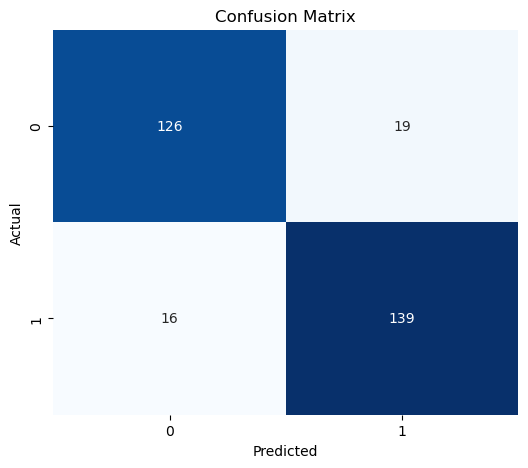

In [40]:
from sklearn.metrics import confusion_matrix

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()